In [12]:
from rfoversample import RFOversample
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rfphate import RFPHATE, dataprep
from phate import PHATE

In [13]:
parkinsons = pd.read_csv('./datasets/parkinsons.csv')
parkinsons

,status,MDVP_Fo,MDVP_Fhi,MDVP_Flo,MDVP_Jitter_pct,MDVP_Jitter,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,1,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,1,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,1,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,0,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,0,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,0,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [14]:
y = parkinsons['status']
x = parkinsons.drop(['status'], axis=1)

In [15]:
print(f"Total observations: {parkinsons.shape[0]}")
print(parkinsons[parkinsons['status'] == 0].shape[0])
print(parkinsons[parkinsons['status'] == 1].shape[0])

Total observations: 195
48
147


In [16]:
PUpsample = RFOversample(parkinsons, 'status')
x_upsampled, y_upsampled = PUpsample.fit()

In [17]:
y_upsampled.name = 'status'
parkinsons_upsampled = pd.concat([y_upsampled, x_upsampled], axis=1)
parkinsons_upsampled.shape[0]

294

[Text(0.5, 1.0, 'Upsampled Data')]

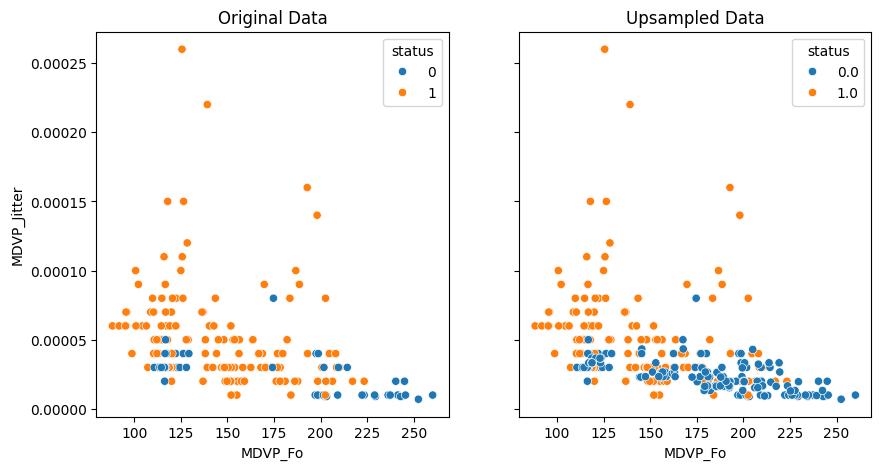

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

sns.scatterplot(data=parkinsons, x='MDVP_Fo', y='MDVP_Jitter', hue='status', ax=ax[0])
ax[0].set(title='Original Data')
sns.scatterplot(data=parkinsons_upsampled, x='MDVP_Fo', y='MDVP_Jitter', hue='status', ax=ax[1])
ax[1].set(title='Upsampled Data')

In [19]:
rfphate_original = RFPHATE(random_state=42)
rfphate_upsampled = RFPHATE(random_state=42)
phate_orignal = PHATE(random_state=42)
phate_upsampled = PHATE(random_state=42)

In [20]:
rfphate_embedding_original = rfphate_original.fit_transform(x, y)
rfphate_embedding_upsampled = rfphate_upsampled.fit_transform(x_upsampled, y_upsampled)
phate_embedding_original = phate_orignal.fit_transform(x)
phate_embedding_upsampled = phate_upsampled.fit_transform(x_upsampled)

    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 0.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.02 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.06 seconds.
Calculated PHATE in 0.14 seconds.
Calculating PHATE...
  Running PHATE on 294 observations and 22 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.02 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 0.10 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.04 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.14 seconds.
Calculated PHATE in 0.31 seconds.


[Text(0.5, 1.0, 'RFPHATE Embedding on Upsampled Data')]

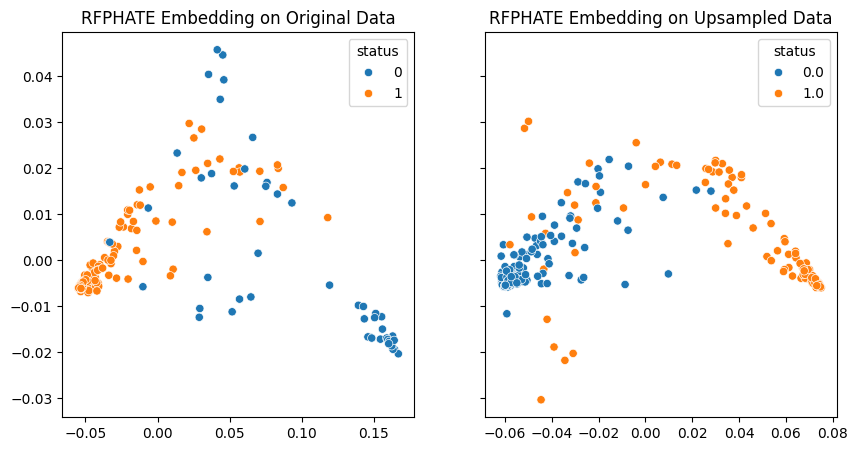

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

sns.scatterplot(x=rfphate_embedding_original[:,0], y=rfphate_embedding_original[:,1], hue=y, ax=ax[0])
ax[0].set(title="RFPHATE Embedding on Original Data")
sns.scatterplot(x=rfphate_embedding_upsampled[:, 0], y=rfphate_embedding_upsampled[:,1], hue=y_upsampled, ax=ax[1])
ax[1].set(title="RFPHATE Embedding on Upsampled Data")

[Text(0.5, 1.0, 'PHATE Embedding on Upsampled Data')]

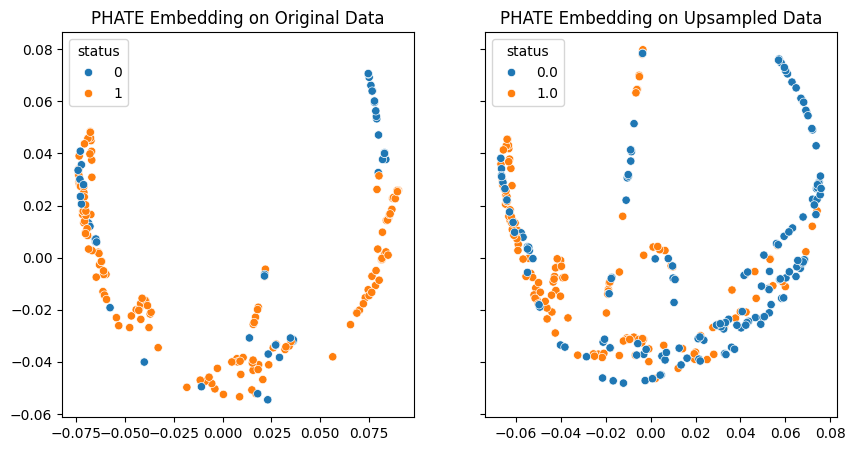

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

sns.scatterplot(x=phate_embedding_original[:,0], y=phate_embedding_original[:,1], hue=y, ax=ax[0])
ax[0].set(title="PHATE Embedding on Original Data")
sns.scatterplot(x=phate_embedding_upsampled[:, 0], y=phate_embedding_upsampled[:,1], hue=y_upsampled, ax=ax[1])
ax[1].set(title="PHATE Embedding on Upsampled Data")